In [10]:
# Install necessary packages
#!pip install opencv-python tensorflow

## Import libraries

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure, filters
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

## Function to display an image

In [12]:
def display_image(image, title, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.axis("off")
    plt.title(title)
    plt.show()

## Function for histogram equalization

In [13]:
def histogram_equalization(image_path):
    image = io.imread(image_path, as_gray=True)
    equalized_image = exposure.equalize_hist(image)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    display_image(image, 'Original Image', cmap='gray')
    plt.subplot(1, 2, 2)
    display_image(equalized_image, 'Histogram Equalized Image', cmap='gray')
    plt.tight_layout()
    plt.show()

## Function for edge detection using Canny

In [14]:
def edge_detection(image):
    edges = cv2.Canny(image, 100, 200)
    display_image(edges, 'Edge Detection', cmap='gray')

## Function for data augmentation

In [32]:
def data_augmentation(image_path, num_images=10):
    datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1,
                                 shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True)
    img = load_img(image_path)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    augmented_images = []
    for i, batch in enumerate(datagen.flow(x, batch_size=1)):
        augmented_images.append(array_to_img(batch[0]))
        if i >= num_images - 1:
            break

    plt.figure(figsize=(15, 6))
    plt.subplot(1, num_images + 1, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')
    
    for i in range(num_images):
        plt.subplot(1, num_images + 1, i + 2)
        plt.imshow(augmented_images[i])
        plt.title(f'Augmented Image {i + 1}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

## Function for morphological operations (Erosion)

In [16]:
def morphological_operations(image):
    kernel = np.ones((5, 5), np.uint8)
    eroded_image = cv2.erode(image, kernel, iterations=1)
    display_image(eroded_image, 'Morphological Operations (Erosion)', cmap='gray')

## Function for thresholding

In [17]:
def thresholding(image):
    thresh_value = filters.threshold_otsu(image)
    binary_image = image > thresh_value
    display_image(binary_image, 'Thresholding', cmap='gray')

## Main function to apply all operations

In [47]:
path = "th (1).jpeg"
img = cv2.imread(path)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

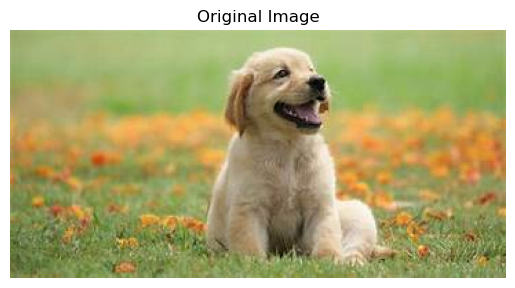

In [49]:
display_image(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 'Original Image')

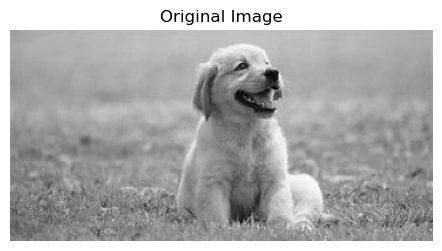

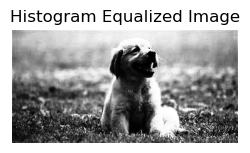

<Figure size 640x480 with 0 Axes>

In [48]:
histogram_equalization(path)

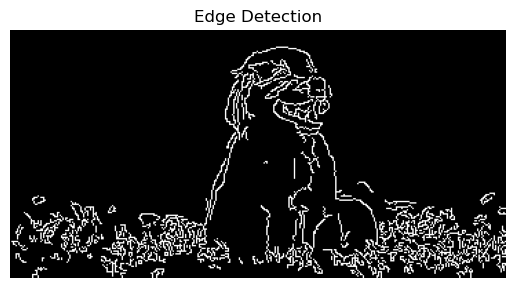

In [50]:
edge_detection(gray_image)

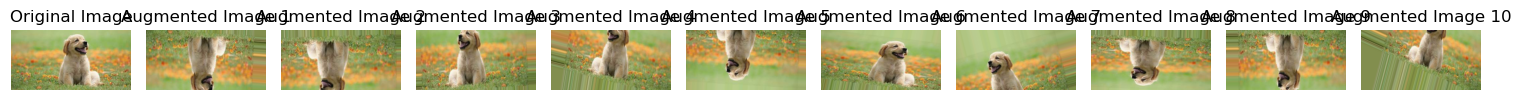

In [51]:
data_augmentation(path)

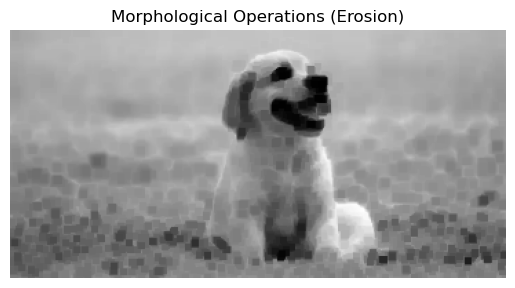

In [52]:
morphological_operations(gray_image)

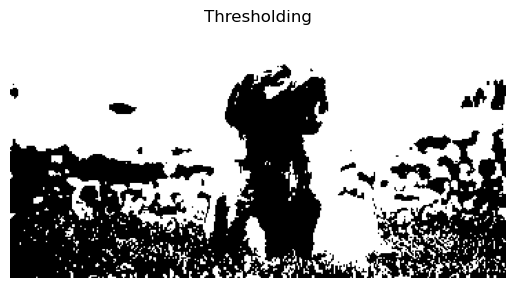

In [53]:
thresholding(gray_image)